In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [30]:
epoch_num = 5

In [31]:
working_dir = os.getcwd()
print(working_dir)

# get the parent directory
parent_dir = os.path.dirname(working_dir)
print(parent_dir)

# get the data directory
data_dir5 = os.path.join(parent_dir, 'data/5epochs')
print(data_dir5)
data_dir2 = os.path.join(parent_dir, 'data/2epochs')
print(data_dir2)
data_dir1 = os.path.join(parent_dir, 'data/1epoch')
print(data_dir1)

data_dir521 = os.path.join(parent_dir, 'data/epoch521')
print(data_dir521)

/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/FL_code
/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part
/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/5epochs
/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/2epochs
/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/1epoch
/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/epoch521


In [32]:
# find all the folders in the data directory
folder5 = os.listdir(data_dir5)
# print(folder5)
folder2 = os.listdir(data_dir2)
# print(folder2)
folder1 = os.listdir(data_dir1)
# print(folder1)

net_folder5 = []
# get the folders that contain the network
for folder in folder5:
    if folder.startswith('net'):
        net_folder5.append(folder)
print(net_folder5)

net_folder2 = []
# get the folders that contain the network
for folder in folder2:
    if folder.startswith('net'):
        net_folder2.append(folder)
print(net_folder2)

net_folder1 = []
# get the folders that contain the network
for folder in folder1:
    if folder.startswith('net'):
        net_folder1.append(folder)
print(net_folder1)

['net2', 'net1']
['net5', 'net2', 'net3', 'net4', 'net1']
['net5', 'net2', 'net3', 'net4', 'net10', 'net8', 'net1', 'net6', 'net7', 'net9']


In [33]:
model_path5 = []
# open each folder and get the .pth files
for folder in net_folder5:
    folder_path = os.path.join(data_dir5, folder)
    # print(folder_path)
    files = os.listdir(folder_path)
    # print(files)
    for file in files:
        if file.endswith('net_state_dict_alexnet.pth'):
            file_path = os.path.join(folder_path, file)
            # print(file_path)
            # print('*************')
            model_path5.append(file_path)

print(model_path5)

model_path2 = []
# open each folder and get the .pth files   
for folder in net_folder2:
    folder_path = os.path.join(data_dir2, folder)
    # print(folder_path)
    files = os.listdir(folder_path)
    # print(files)
    for file in files:
        if file.endswith('net_state_dict_alexnet.pth'):
            file_path = os.path.join(folder_path, file)
            # print(file_path)
            # print('*************')
            model_path2.append(file_path)
            
print(model_path2)

model_path1 = []
# open each folder and get the .pth files
for folder in net_folder1:
    folder_path = os.path.join(data_dir1, folder)
    # print(folder_path)
    files = os.listdir(folder_path)
    # print(files)
    for file in files:
        if file.endswith('net_state_dict_alexnet.pth'):
            file_path = os.path.join(folder_path, file)
            # print(file_path)
            # print('*************')
            model_path1.append(file_path)
            
print(model_path1)

['/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/5epochs/net2/net_state_dict_alexnet.pth', '/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/5epochs/net1/net_state_dict_alexnet.pth']
['/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/2epochs/net5/net_state_dict_alexnet.pth', '/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/2epochs/net2/net_state_dict_alexnet.pth', '/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/2epochs/net3/net_state_dict_alexnet.pth', '/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/2epochs/net4/net_state_dict_alexnet.pth', '/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/2epochs/net1/net_state_dict_alexnet.pth']
['/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/1epoch/net5/net_state_dict_alexnet.pth', '/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/1epoch/net2/net_state_dict_alexnet.pth', '/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/1epoch/net3

In [39]:
model_path = [model_path5[0], model_path2[0], model_path2[1], model_path2[2], model_path5[1]]
print(model_path)

['/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/5epochs/net2/net_state_dict_alexnet.pth', '/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/2epochs/net5/net_state_dict_alexnet.pth', '/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/2epochs/net2/net_state_dict_alexnet.pth', '/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/2epochs/net3/net_state_dict_alexnet.pth', '/Users/dtjgp/Learning/Thesis/GreenAI/M1chip/Third_part/data/5epochs/net1/net_state_dict_alexnet.pth']


In [40]:
import torch
from torch import nn
from d2l import torch as d2l

In [41]:
# Define your model architecture as provided
net = nn.Sequential(
    # 这里使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10))

model_paths = model_path

model_performances = [0.85, 0.8, 0.8, 0.8, 0.85]
total_performance = sum(model_performances)


# Load all model state dictionaries
state_dicts = [torch.load(path, map_location='cpu') for path in model_paths]
# print(state_dicts[1].keys())

# weights = [1.0 / len(state_dicts)] * len(state_dicts) 
weights = [performance / total_performance for performance in model_performances]


# Calculate the average of the parameters
avg_state_dict = {}
# for key in state_dicts[0]:
#     # Sum all parameters
#     sum_param = sum(state_dict[key] for state_dict in state_dicts)
#     # Take average
#     # avg_state_dict[key] = sum_param / len(state_dicts)
#     avg_state_dict[key] = sum_param
# # avg_state_dict = state_dicts[0]

for key in state_dicts[0]:
    weighted_sum_param = sum(weight * state_dict[key] for weight, state_dict in zip(weights, state_dicts))
    avg_state_dict[key] = weighted_sum_param

# Update the combined model with the averaged parameters
net.load_state_dict(avg_state_dict)

# Save the combined model
torch.save(net.state_dict(), os.path.join(data_dir521, 'combined_model_state_dict.pth'))

In [42]:
# load the combined model
net.load_state_dict(torch.load(os.path.join(data_dir521, 'combined_model_state_dict.pth')))

# load the test dataset
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

# set the model to evaluation mode
test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
print(test_acc)

0.1


### open the recorded acc data and the energy data

In [38]:
# find all the folders in the data directory
folders = os.listdir(data_dir)
print(folders)

data_folder = []
for name in folders:
    if name.startswith('net'):
        data_folder.append(name)
print(data_folder)

acc_data_files = []
train_acc_files = []
train_l_files = []
energy_data_files = []

# open each folder and get the .pth files
for folder in data_folder:
    folder_path = os.path.join(data_dir, folder)
    info_folder_path = os.path.join(folder_path, 'info')
    # print(folder_path)
    files = os.listdir(info_folder_path)
    print(files)
    for file in files:
        if file.startswith('acc_data'):
            file_path = os.path.join(info_folder_path, file)
            # print(file_path)
            # print('*************')
            acc_data_files.append(file_path)
        elif file.startswith('train_acc'):
            file_path = os.path.join(info_folder_path, file)
            # print(file_path)
            # print('*************')
            train_acc_files.append(file_path)
        elif file.startswith('train_l'):
            file_path = os.path.join(info_folder_path, file)
            # print(file_path)
            # print('*************')
            train_l_files.append(file_path)
        elif file.startswith('energy_data_epoch'):
            file_path = os.path.join(info_folder_path, file)
            # print(file_path)
            # print('*************')
            energy_data_files.append(file_path)
            

print(acc_data_files)
print(train_acc_files)
print(train_l_files)
print(energy_data_files)

NameError: name 'data_dir' is not defined

#### acc_data_matrix

In [ ]:
acc_data_matrix = np.zeros((len(acc_data_files), epoch_num))
for acc_data_file in acc_data_files:
    acc_data = np.load(acc_data_file, allow_pickle=True)
    # print(acc_data)
    acc_data_matrix[acc_data_files.index(acc_data_file), :] = acc_data
print(acc_data_matrix)  

[[0.7206 0.7937 0.8074 0.8292 0.8536]
 [0.7476 0.7965 0.8223 0.8374 0.8396]]


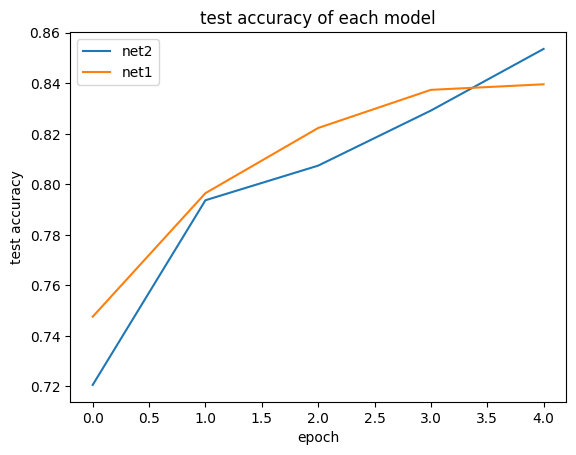

In [ ]:
# plot each model's test accuracy in the same figure
plt.figure()
for i in range(acc_data_matrix.shape[0]):
    plt.plot(acc_data_matrix[i, :], label=data_folder[i])
plt.legend()
plt.xlabel('epoch')
plt.ylabel('test accuracy')
plt.title('test accuracy of each model')
# plt.savefig(os.path.join(data_dir, 'test_acc.png'))
plt.show()

#### train_acc_matrix

In [ ]:
train_acc_matrix = np.zeros((len(train_acc_files), epoch_num, 469))
for train_acc_file in train_acc_files:
    train_acc = np.load(train_acc_file, allow_pickle=True)
    print(train_acc.shape)
    train_acc_matrix[train_acc_files.index(train_acc_file),:, :] = train_acc
print(train_acc_matrix)

(5, 469)
(5, 469)
[[[0.078125   0.09375    0.09114583 ... 0.44039414 0.44085537 0.44116667]
  [0.640625   0.70703125 0.73958333 ... 0.74392733 0.74404046 0.74413333]
  [0.7109375  0.75       0.7578125  ... 0.79404778 0.79417067 0.7943    ]
  [0.703125   0.7421875  0.77083333 ... 0.8220356  0.82194845 0.82198333]
  [0.8125     0.80078125 0.79947917 ... 0.8389822  0.83900908 0.8391    ]]

 [[0.1015625  0.10546875 0.09895833 ... 0.50567117 0.50609308 0.50635   ]
  [0.6796875  0.7265625  0.70572917 ... 0.75337928 0.753539   0.75351667]
  [0.7109375  0.75390625 0.76041667 ... 0.79719285 0.79719217 0.79726667]
  [0.796875   0.828125   0.83333333 ... 0.82611751 0.82618857 0.82616667]
  [0.8359375  0.8515625  0.86197917 ... 0.84137446 0.84131277 0.84125   ]]]


In [ ]:
train_acc_avg = np.mean(train_acc_matrix, axis=2)
print(train_acc_avg)
    

[[0.2559912  0.72387626 0.78316747 0.81588068 0.83390727]
 [0.31642849 0.73260018 0.78794372 0.82267058 0.83699351]]


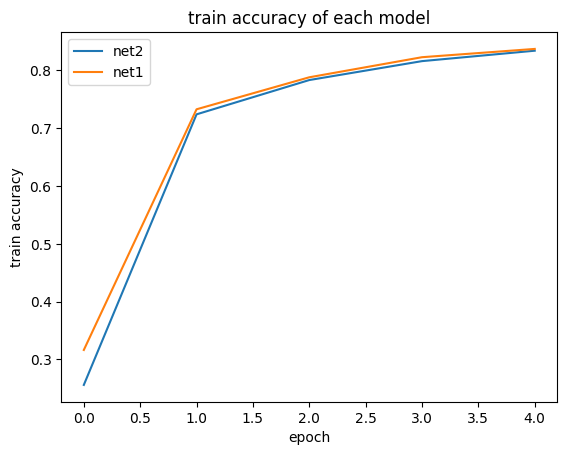

In [ ]:
# plot each model's train accuracy in the same figure
plt.figure()
for i in range(train_acc_avg.shape[0]):
    plt.plot(train_acc_avg[i, :], label=data_folder[i])
plt.legend()
plt.xlabel('epoch')
plt.ylabel('train accuracy')
plt.title('train accuracy of each model')
# plt.savefig(os.path.join(data_dir, 'train_acc.png'))
plt.show()

#### train_l_matrix

In [ ]:
train_l_matrix = np.zeros((len(train_l_files), epoch_num, 469))
for train_l_file in train_l_files:
    train_l = np.load(train_l_file, allow_pickle=True)
    print(train_l.shape)
    train_l_matrix[train_l_files.index(train_l_file),:, :] = train_l
print(train_l_matrix)

(5, 469)
(5, 469)
[[[2.30339479 2.30274153 2.30322337 ... 1.50596969 1.50455123 1.5035056 ]
  [0.83139372 0.78524333 0.74768313 ... 0.68287305 0.6827054  0.6826386 ]
  [0.78814125 0.6695717  0.67605267 ... 0.55126128 0.55096479 0.55071394]
  [0.73776042 0.61871693 0.56109422 ... 0.48325141 0.48322334 0.48305506]
  [0.48587525 0.48146339 0.49069207 ... 0.43707324 0.43684104 0.43660535]]

 [[2.30076742 2.29980588 2.30197144 ... 1.30992892 1.30867623 1.30778407]
  [0.79421377 0.74231395 0.79814605 ... 0.6558019  0.65560254 0.65554091]
  [0.75392008 0.67775923 0.63494351 ... 0.54253833 0.542574   0.54234573]
  [0.44476643 0.43644579 0.41786612 ... 0.47194427 0.47180829 0.47185983]
  [0.41187331 0.40297361 0.37981724 ... 0.43120528 0.43131187 0.43152245]]]


In [ ]:
train_l_avg = np.mean(train_l_matrix, axis=2)
print(train_l_avg)

[[1.9955446  0.73485333 0.57930823 0.49294412 0.44517974]
 [1.81031328 0.71019078 0.56671623 0.48037611 0.44201649]]


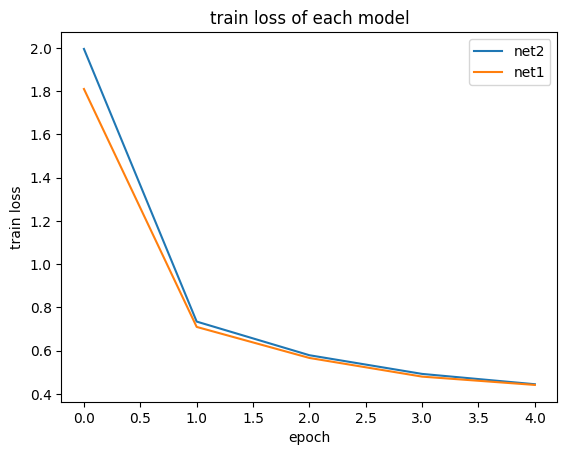

In [ ]:
# plot each model's train loss in the same figure
plt.figure()
for i in range(train_l_avg.shape[0]):
    plt.plot(train_l_avg[i, :], label=data_folder[i])
plt.legend()
plt.xlabel('epoch')
plt.ylabel('train loss')
plt.title('train loss of each model')
# plt.savefig(os.path.join(data_dir, 'train_loss.png'))
plt.show()

#### energy_data

In [ ]:
energy_data_matrix = np.zeros((len(energy_data_files), epoch_num, 1), dtype=object)
for energy_data_file in energy_data_files:
    energy_data = np.load(energy_data_file, allow_pickle=True)
    # print(energy_data)
    energy_data_matrix[energy_data_files.index(energy_data_file),:, :] = energy_data
print(energy_data_matrix)

[[[list([11279, 16123, 11115, 10080, 9546, 11017, 10428, 9697, 10413, 10024, 9987, 9867, 12460, 11779, 10589, 10288, 9813, 9512, 10823, 10007, 9583, 16418, 10140, 10657, 11161, 9113, 11013, 16838, 17616, 9878, 9330, 9256, 8687, 8344, 9429, 9536, 11412, 8594, 9042, 9021, 8214, 9056, 9185, 11046, 8632, 9123, 8893, 8735, 10166, 9655, 8867, 8773, 9234, 9968, 9575, 8602, 9232, 8856, 8750, 8698, 9103, 8917, 8367, 9097, 9204, 8692, 8368, 9167, 8918, 8702, 8698, 9069, 9082, 10745, 9037, 9651, 8861, 10594, 9317, 9333, 8732, 8708, 9227, 8886, 8214, 9168, 9349, 8694, 8352, 9245, 8990, 8685, 8796, 9118, 11369, 14405, 10944, 8672, 9598, 8998, 8813, 8709, 10796, 9701, 8373, 9526, 9345, 10618, 12619, 10754, 9624, 9468, 8377, 9229, 9246, 8862, 8346, 9285, 9166, 9025, 8580, 9432, 9081, 8717, 8741, 9226, 9032, 8302, 9334, 9760, 9023, 9156, 12867, 9832, 9843, 9923, 9852, 11609, 9878, 9497, 9758, 9273, 10807, 17096, 10021, 9904, 12844, 17263, 15534, 13713, 11067, 10453, 9279, 9507, 10253, 9296, 9177, 9772

In [ ]:
energy_data_avg = np.zeros((energy_data_matrix.shape[0], energy_data_matrix.shape[1]))
for i in range(energy_data_matrix.shape[0]):
    devicei_energy = energy_data_matrix[i, :, :]
    for j in range(devicei_energy.shape[0]):
        devicei_energy_epochi = np.array(devicei_energy[j, :][0])
        # print(devicei_energy_epochi)
        devicei_energy_epochi_mean = np.mean(devicei_energy_epochi)    
        # print(devicei_energy_epochi_mean)
        energy_data_avg[i, j] = devicei_energy_epochi_mean    
print(energy_data_avg)
        
    

[[10141.94010417 10506.81984334 11390.64082687 12298.03836317
  12063.93861893]
 [11521.19060052 10068.37726098 10974.80976864 10669.7244898
   9962.6961039 ]]


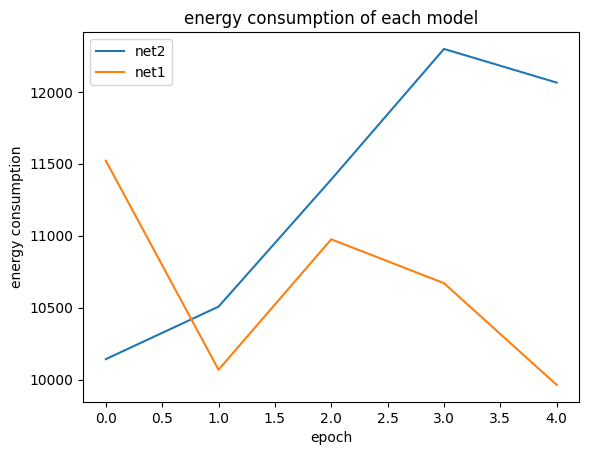

In [ ]:
# plot each model's energy consumption in the same figure
plt.figure()
for i in range(energy_data_avg.shape[0]):
    plt.plot(energy_data_avg[i, :], label=data_folder[i])
plt.legend()
plt.xlabel('epoch')
plt.ylabel('energy consumption')
plt.title('energy consumption of each model')
# plt.savefig(os.path.join(data_dir, 'energy_consumption.png'))
plt.show()